# **Pittsburgh Police Arrest Data**

![Police GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExbzVsOTdxY29rbHgwbnZqcGpwZXNmdjMzcm8xYXczcWtmN2M4bXczbCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/RYjnzPS8u0jAs/giphy.gif)

## **Initial Set-Up: ✅**
- import pandas and matplotlib, which are tools to allow us to ____ with python
- adjust display settings to show all rows and columns, so we can see all of the data that the police provide
- import the police data by reading the csv file

In [11]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# adjust display settings to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [13]:
# read in the data
policeData = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")

## **A Preview of the Data: 🔎🗂️**
- the arrest data ranges from 2016-2023
- let's take a look at 5 random entries to get a glimpse of the data

In [14]:
# display 5 entries at random to get a glimpse of the data
policeData.sample(5)
# the arrest data starts from 2016, so it's fairly recent (last 8 years)
# most of the categories are self explanatory, I will give more context below

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
13457,13458,1991456,17151370,31.0,M,W,2017-10-04T11:30:00,Zone 1,9015 Failure To Appear/Arrest on Attachment Order,Zone 1,NaN,1,NaN,NaN,NaN,NaN,NaN
56862,75222,2049949,22098349,58.0,M,B,2022-07-13T19:16:00,"5200 Block 2nd AV Pittsburgh, PA 15207",2702 Aggravated Assault.,"200 Block Trowbridge ST Pittsburgh, PA 15207",Hazelwood,4,1515.0,5.0,3.0,-79.941690,40.405565
40311,47550,2026083,20064047,37.0,M,B,2020-04-03T05:16:00,"900 Block Liberty AV Pittsburgh, PA 15222",3503(a) Criminal Trespass,"900 Block Liberty AV Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-79.997939,40.442945
21066,21067,2001219,18105380,46.0,M,B,2018-06-03T19:50:00,"6200 Block Penn AV Pittsburgh, PA 15206",9501 Bench Warrant,"6200 Block Penn AV Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,NaN,NaN
817,818,1974971,16155240,21.0,M,W,2016-08-20T17:30:00,"1000 Block 1st ST Mckees Rocks, PA 15136",903 Criminal Conspiracy. / 3701 Robbery. / 370...,"300 Block Stadium ST Pittsburgh, PA 15204",Sheraden,6,2018.0,2.0,5.0,-80.052000,40.460675


## **Extra Information About Each Category: 📋**
**ARREST_ID:** Unique identifier (uniqueID - yes) for each arrest incident

**CCR:** Incident Number (uniqueID - yes) ([RadioReference Wiki](https://wiki.radioreference.com/index.php/Allegheny_County_(PA)_Pittsburgh_City_Police_Terminology,_Acronyms,_and_Abbreviations) - Each call or incident a police officer responds to, no matter how minor, is assigned a unique record number. The numbering system starts at "1" for the first incident or call at the beginning of a calendar year. Numbers are assigned as calls come in or incidents are responded to. The CCR Number may also be referred to as "Number", "Detail", "Detail Number", etc.) 

**ZONE:** Police Zone where Incident occurred

## **With a 🎯Focus on Incident Neighborhood:**
- for each neighborhood, count how many arrests occurred in it
- order the neighborhoods from least arrests (best neighborhoods) to most arrests (worst neighborhoods)
- I debated giving a weight to the severity of the offenses committed that caused the arrest to happen, ultimately they all looked like offenses that you don't want to happen, so they were weighted equally, and my aim is to find a neighborhood with a low amount of arrests
- **let's plot the data with a simple bar chart, each bar represents the number of arrests in each neighborhood**

In [15]:
relevant_columns = ['INCIDENTNEIGHBORHOOD']
policeData = policeData[relevant_columns]

In [16]:
neighborhood_counts = policeData['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True)

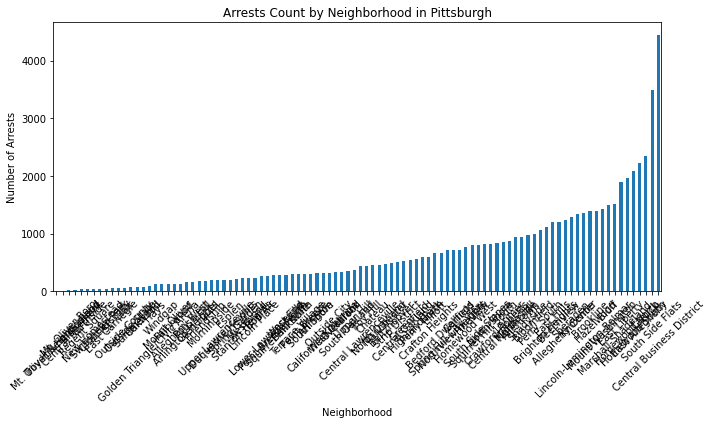

In [17]:
# plotting the data using a bar chart
plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Arrests Count by Neighborhood in Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **(difficult to read, let's modify the visuals...)**
- it's difficult to read any of the neighborhoods or to see the amount of arrests, so I decided to order them in a table shown below
- the following table will show the **best** to **worst** neighborhoods (top to bottom)

In [18]:
# displaying a table with neighborhoods from least arrests to most arrests
neighborhood_counts_table = neighborhood_counts.reset_index()
neighborhood_counts_table.columns = ['Neighborhood', 'Number of Arrests']
print("\nNeighborhoods by Arrest Count (Least to Most):")
print(neighborhood_counts_table)

# be sure to add +1 for the rankings to calculate the average (Mt. Oliver Neighborhood will be 0+1, etc.)


Neighborhoods by Arrest Count (Least to Most):
                   Neighborhood  Number of Arrests
0       Mt. Oliver Neighborhood                  2
1        Troy Hill-Herrs Island                  6
2               Mt. Oliver Boro                 18
3             Central Northside                 23
4                     Ridgemont                 37
5                 Regent Square                 37
6                 New Homestead                 39
7                Swisshelm Park                 43
8                Chartiers City                 46
9                 East Carnegie                 48
10                    St. Clair                 55
11               Outside County                 57
12                Outside State                 67
13                  Summer Hill                 76
14                      Oakwood                 82
15  Golden Triangle/Civic Arena                 83
16                         Hays                120
17                      Windgap   

## **🚨Let's Take a Look at the Distribution:📉🤯**
- I'm interested in seeing which "amount" of arrests were the most common among neighborhoods
- looks like an exponential distribution
- most neighborhoods have between 0-250 arrests, pretty good!
- stay away from the neighborhoods that have more

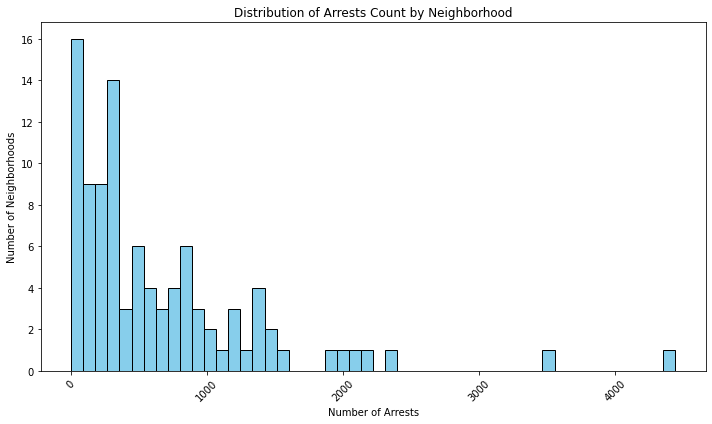

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the police data CSV file
policeData = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")

# Extract relevant columns
relevant_columns = ['INCIDENTNEIGHBORHOOD']
policeData = policeData[relevant_columns]

# Count the number of arrests in each neighborhood
neighborhood_counts = policeData['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True)

# Create a histogram of arrest counts
plt.figure(figsize=(10, 6))
plt.hist(neighborhood_counts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Arrests Count by Neighborhood')
plt.xlabel('Number of Arrests')
plt.ylabel('Number of Neighborhoods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **📝👏 Conclusion 🙇**

**Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.**

My favorite neighborhoods in Pittsburgh are Oakland (because of Pitt, Phipps, and the many places you can walk to), Cranberry (Whole Foods, shopping), McCandless (restaurants, shopping, North Park), and Shadyside (restaurants, shopping). Out of these neighborhoods, North Oakland had 455 arrests, South Oakland had 354 arrests, Central Oakland had 521 arrests, and West Oakland had 325 arrests. Shadyside had 971 arrests. Cranberry and McCandless were not included in the data set. Oakland ranked in the mid 40s, and Shadyside ranked 76. Since my data set included 98 neighborhoods, ranking mid 40s is pretty good. I think when choosing a neighborhood, one must factor in more data sets (>3) to make a well-rounded decision. Ultimately, living somewhere and getting experience in that location is the best way to find out whether you like to live there or not.